In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

!pip install gradio

In [40]:
csv_file_path = "../Resources/card_transdata.csv"
df = pd.read_csv(csv_file_path)


<AxesSubplot:xlabel='fraud', ylabel='count'>

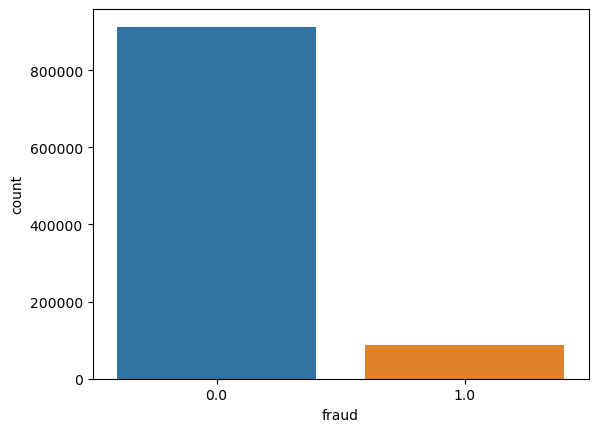

In [41]:
# UNBALANCED DATA

sns.countplot(x='fraud',data=df)

In [42]:
# Balance the class distribution by undersampling the majority class(non-fraud) and oversampling the minority class (fraud)


# Shuffle 'df' rows to randomise the order of data
df = df.sample(frac=1)


# Create new DataFrame fraud_df that contains only rows where the fraud columns has value 1
fraud_df = df.loc[df['fraud'] == 1]

# Create new DataFrame fraud_df that contains only rows where the fraud columns has value 0.. Slicing row to match numner of fraud rows (87403)
non_fraud_df = df.loc[df['fraud'] == 0][:87403]


#Concatenate fraud_df and non_fraud_df and create new DataFrame normal_distributed_df with balanced class distribution
normal_distributed_df = pd.concat([fraud_df, non_fraud_df]).sample(frac=1, random_state=42)

# Shuffle normal_distributed_df to ensure final order of rows is randomized
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
473380,8.061559,0.123187,8.166728,1.0,0.0,0.0,1.0,1.0
83787,12.730101,0.160689,0.757105,1.0,0.0,0.0,1.0,0.0
91748,4.290823,0.961892,0.591690,1.0,0.0,0.0,1.0,0.0
795268,26.724187,1.556237,0.644938,1.0,0.0,0.0,1.0,0.0
460771,32.490894,0.469615,0.735941,1.0,1.0,0.0,1.0,0.0


In [43]:


print('Distribution of the Classes in the subsample dataset')
print(new_df['fraud'].value_counts()/len(new_df))





Distribution of the Classes in the subsample dataset
fraud
1.0    0.5
0.0    0.5
Name: count, dtype: float64


In [44]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression

x = new_df.drop(['fraud'],axis=1)
y = new_df['fraud']

# Split the data using train_test_split
# Instantiate the Logistic Regression Model
# Assign a random_state parameter of  to the model

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

logistic = LogisticRegression(max_iter=1000)


# Fit the model using training data

model = logistic.fit(x_train, y_train)

# Predict and Print the accuracy score of the model

prediction = model.predict(x_test)

print("Accuracy - " + str(accuracy_score(y_test,prediction)))
print("Recall - " + str(recall_score(y_test,prediction)))
print("precision - " + str(precision_score(y_test,prediction)))


Accuracy - 0.9395679831586655
Recall - 0.947011988651963
precision - 0.9331349474728347


In [45]:

# Random Classifier

x1 = new_df.drop(['fraud'],axis=1)
y1 = new_df['fraud']

In [46]:
# Split the data using train_test_split
# Instantiate the Random Classfier Model

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=42)

randomforest = RandomForestClassifier()

In [47]:
# Fit the model using training data

model1 = randomforest.fit(x1_train,y1_train)

In [48]:
#Predict and print accuracy score

prediction1 = model1.predict(x1_test)
accuracy_score(y1_test,prediction1)

print("Accuracy - " + str(accuracy_score(y1_test,prediction1)))
print("Recall - " + str(recall_score(y1_test,prediction1)))
print("precision - " + str(precision_score(y1_test,prediction1)))

Accuracy - 0.9999542355040959
Recall - 1.0
precision - 0.9999084919472914


In [49]:
# Decisison Tree

x2 = new_df.drop(['fraud'],axis=1)
y2 = new_df['fraud']
dt = DecisionTreeRegressor()

In [50]:
# Training and fitting the models

x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=123)

model2 = dt.fit(x2_train,y2_train)

In [51]:
#Predict and print accuracy score

prediction2 = model2.predict(x2_test)

print("Accuracy - " + str(accuracy_score(y2_test,prediction2)))
print("Recall - " + str(recall_score(y2_test,prediction2)))
print("precision - " + str(precision_score(y2_test,prediction2)))

Accuracy - 0.9998283818313566
Recall - 0.9998093785741518
precision - 0.9998474970452552


In [54]:

import gradio as gr
def credit_card_features(distance_from_home,	distance_from_last_transaction,	ratio_to_median_purchase_price,	repeat_retailer,	used_chip,	used_pin_number,	online_order):
#turning the arguments into a numpy array
  x = np.array([distance_from_home,	distance_from_last_transaction,	ratio_to_median_purchase_price,	repeat_retailer,	used_chip,	used_pin_number,	online_order])
  prediction = model2.predict(x.reshape(1, -1))
  return prediction

  # The models predicted output for above feature input is output to a text box on the gradio interface
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=credit_card_features, inputs=['number','number','number','number','number','number','number'], outputs=outputs,description="This is a Credit Card  model")

C:\Users\anith\AppData\Local\Temp\ipykernel_30568\1859623662.py:9: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs = gr.outputs.Textbox()


In [55]:
app.launch(share=True,debug=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://5e8f002fc8495746b2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


c:\Users\anith\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\anith\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7862 <> https://5e8f002fc8495746b2.gradio.live
